In [542]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [543]:
# helper functions

def make_grid(h):
    return np.arange(interval[0], interval[1], h)

def analytical(h):
    analytical = []
    grid = make_grid(h)
    for tn in grid:
        yn_1 = f_solve(tn)
        analytical.append(yn_1)
    analytical.append(f_solve(grid[-1]+grid[1]))
    return analytical

def make_results(grid, analytical, numerical):
    error = np.absolute(np.array(numerical) - np.array(analytical))
    error_scientific = []
    for x in error:
        error_scientific.append('{:.2e}'.format(x))
    df = pd.DataFrame([grid, analytical, numerical, error_scientific]).T
    df_middle = pd.DataFrame(['...', '...', '...', '...']).T.rename(index={0: '...'})
    df_middle.columns = ['t', 'analytical', 'numerical', '|numerical-analytical|']
    df.columns = ['t', 'analytical', 'numerical', '|numerical-analytical|']
    df.loc[len(grid), 't'] = grid[-1]+grid[1]
    make_plots(grid, analytical, numerical, error)
    return pd.concat([df.head(), df_middle, df.tail()])

def make_plots(grid, analytical, numerical, error):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    grid = np.append(grid, grid[-1]+grid[1])
    ax1.plot(error, grid, 
             marker='s', markersize=9, markerfacecolor='blue',
             linestyle='-', linewidth=5, 
             color='cyan')
    ax1.grid(color='grey', linestyle='dotted')
    ax1.set_xlabel('error', fontsize=15)
    ax1.set_ylabel('t', fontsize=15)
    ax2.plot(grid, numerical, 'b-', label='numerical', alpha=0.50, linewidth=2)
    ax2.plot(grid, analytical, 'g:', label='analytical', alpha=0.75, linewidth=5)
    ax2.legend(loc='upper center', frameon=False)
    ax2.set_xlabel('y', fontsize=15)
    ax2.set_ylabel('t', fontsize=15)

# Part I

In [544]:
interval = [0, 1]

def f(t, y):
    return 4*t*y

def f_solve(t):
    return np.exp(2*t*t)

In [545]:
def runge_kutta(h):
    yn = 1.0
    numerical = []
    grid = make_grid(h)
    numerical.append(yn)
    for tn in grid:
        kn1 = f(tn, yn)
        kn2 = f(tn + h/2, yn + kn1*h/2)
        kn3 = f(tn + h/2, yn + kn2*h/2)
        kn4 = f(tn + h, yn + kn3*h)
        kn = (1/6)*(kn1 + 2*kn2 + 2*kn3 + kn4)
        yn_1 = yn + h*kn
        numerical.append(yn_1)
        yn = yn_1
    return make_results(grid, analytical(h), numerical)

#### h = 0.1

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.1,1.020201,1.020201,6.69e-09
2,0.2,1.083287,1.083287,7.50e-08
3,0.3,1.197217,1.197217,3.55e-07
...,...,...,...,...
7,0.7,2.664456,2.664414,4.23e-05
8,0.8,3.59664,3.596522,1.18e-04
9,0.9,5.05309,5.052774,3.17e-04
10,1.0,7.389056,7.388225,8.31e-04


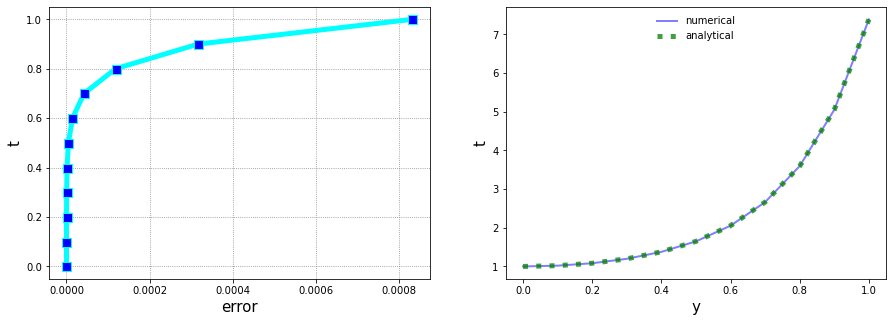

In [546]:
runge_kutta(0.1).drop([4, 6])

#### h = 0.05

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.05,1.005013,1.005013,2.61e-11
2,0.1,1.020201,1.020201,2.68e-10
3,0.15,1.046028,1.046028,1.02e-09
4,0.2,1.083287,1.083287,2.85e-09
...,...,...,...,...
16,0.8,3.59664,3.596632,7.90e-06
17,0.85,4.241852,4.241839,1.32e-05
18,0.9,5.05309,5.053069,2.18e-05
19,0.95,6.079971,6.079936,3.58e-05


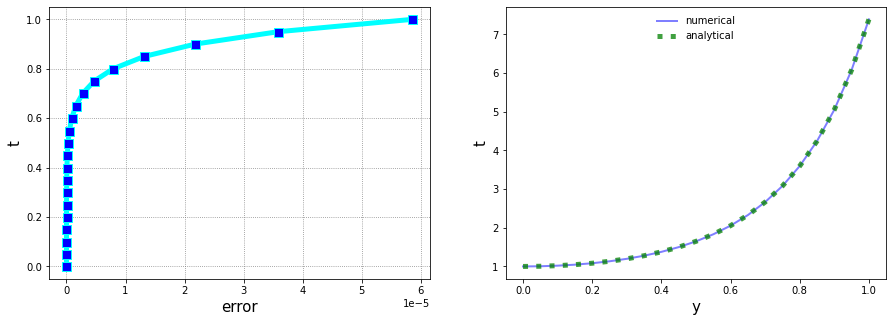

In [547]:
runge_kutta(0.05)

#### h = 0.025

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.025,1.001251,1.001251,1.02e-13
2,0.05,1.005013,1.005013,1.02e-12
3,0.075,1.011314,1.011314,3.67e-12
4,0.1,1.020201,1.020201,9.17e-12
...,...,...,...,...
36,0.9,5.05309,5.053089,1.43e-06
37,0.925,5.535877,5.535875,1.84e-06
38,0.95,6.079971,6.079969,2.36e-06
39,0.975,6.694257,6.694254,3.03e-06


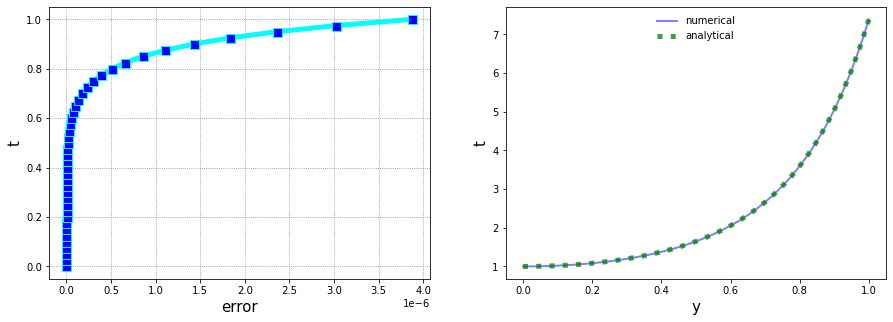

In [548]:
runge_kutta(0.025)

# Part II

In [549]:
interval = [0, 2]

def f(t, y):
    return -25*y+np.cos(t)+25*np.sin(t)

def f_solve(t):
    return np.exp(-25*t)*(1+np.exp(25*t)*np.sin(t))

### Explicit Euler

In [550]:
def explicit_euler(h):
    yn = 1.0
    numerical = []
    grid = make_grid(h)
    numerical.append(yn)
    for tn in grid:
        yn_1 = yn + h*f(tn, yn)
        numerical.append(yn_1)
        yn = yn_1
    return make_results(grid, analytical(h), numerical)

#### h = 0.1

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.1,0.181918,-1.4,1.58e+00
2,0.2,0.205407,2.449084,2.24e+00
3,0.3,0.296073,-3.078946,3.38e+00
4,0.4,0.389464,5.452753,5.06e+00
...,...,...,...,...
16,1.6,0.999574,657.851168,6.57e+02
17,1.7,0.991665,-984.280737,9.85e+02
18,1.8,0.973848,1478.887383,1.48e+03
19,1.9,0.9463,-2215.919176,2.22e+03


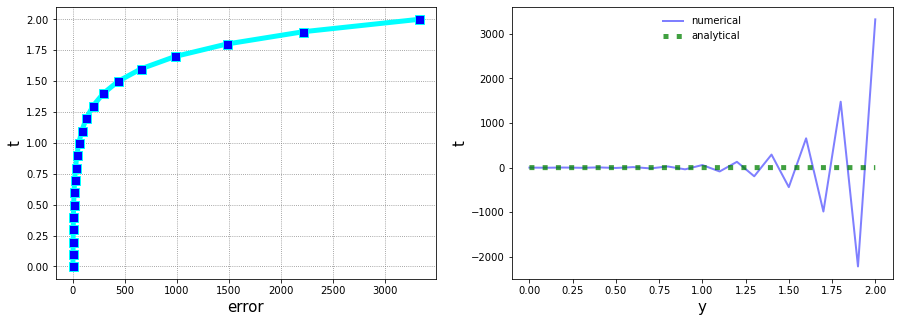

In [551]:
explicit_euler(0.1)

#### h = 0.05

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.05,0.336484,-0.2,5.36e-01
2,0.1,0.181918,0.162411,1.95e-02
3,0.15,0.172956,0.133939,3.90e-02
4,0.2,0.205407,0.202751,2.66e-03
...,...,...,...,...
36,1.8,0.973848,0.974827,9.79e-04
37,1.85,0.961275,0.962243,9.68e-04
38,1.9,0.9463,0.947254,9.54e-04
39,1.95,0.92896,0.929897,9.37e-04


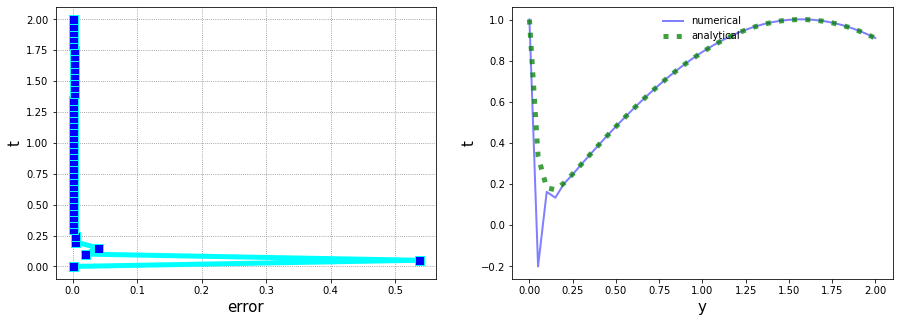

In [552]:
explicit_euler(0.05)

#### h = 0.025

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.025,0.560259,0.4,1.60e-01
2,0.05,0.336484,0.190616,1.46e-01
3,0.075,0.228285,0.127687,1.01e-01
4,0.1,0.181918,0.119643,6.23e-02
...,...,...,...,...
76,1.9,0.9463,0.946778,4.78e-04
77,1.925,0.937923,0.938397,4.74e-04
78,1.95,0.92896,0.92943,4.70e-04
79,1.975,0.919416,0.919881,4.66e-04


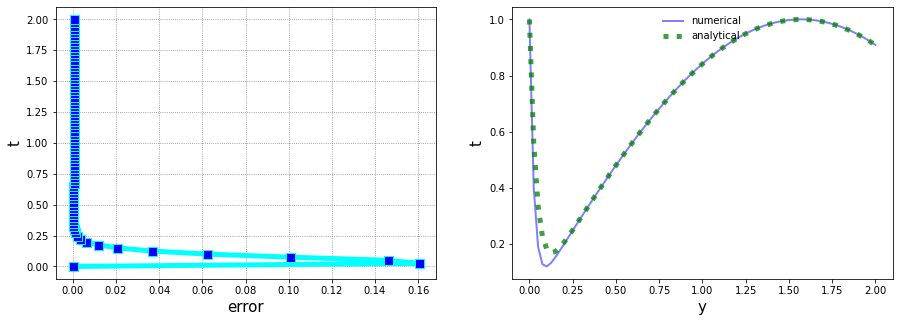

In [553]:
explicit_euler(0.025)

### Implicit Euler

In [554]:
def implicit_euler(h, eps):
    yn = 1.0
    numerical = []
    grid = make_grid(h)
    numerical.append(yn + h*f(0.0, yn))
    for tn in grid:
        yk = yn + h*f(tn, yn)
        while True:
            yk_1 = yn + h*f(tn + h, yk)
            if abs(yk_1-yk) < eps:
                break
            yk = yk_1
        yn_1 = yn + h*f(tn + h, yk_1)
        numerical.append(yn_1)
        yn = yn_1
    return make_results(grid, analytical(h), numerical)

#### h = 0.1

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,-1.4,2.40e+00
1,0.1,0.181918,-10.773626,1.10e+01
2,0.2,0.205407,118.452937,1.18e+02
3,0.3,0.296073,-1285.710439,1.29e+03
4,0.4,0.389464,13985.717139,1.40e+04
...,...,...,...,...
16,1.6,0.999574,38266945060170176.0,3.83e+16
17,1.7,0.991665,-416153027529350784.0,4.16e+17
18,1.8,0.973848,4525664174381689344.0,4.53e+18
19,1.9,0.9463,-49216597896400879616.0,4.92e+19


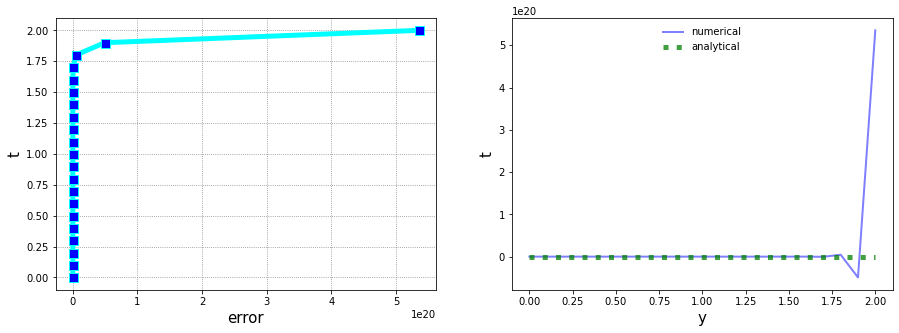

In [555]:
implicit_euler(0.1, 1000000000000000000000)
# eps < 10^21 gives runtime error

#### h = 0.05

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,-0.2,1.20e+00
1,0.05,0.336484,-0.590603,9.27e-01
2,0.1,0.181918,0.510362,3.28e-01
3,0.15,0.172956,-0.113288,2.86e-01
4,0.2,0.205407,0.367359,1.62e-01
...,...,...,...,...
36,1.8,0.973848,0.975196,1.35e-03
37,1.85,0.961275,0.962607,1.33e-03
38,1.9,0.9463,0.947612,1.31e-03
39,1.95,0.92896,0.930249,1.29e-03


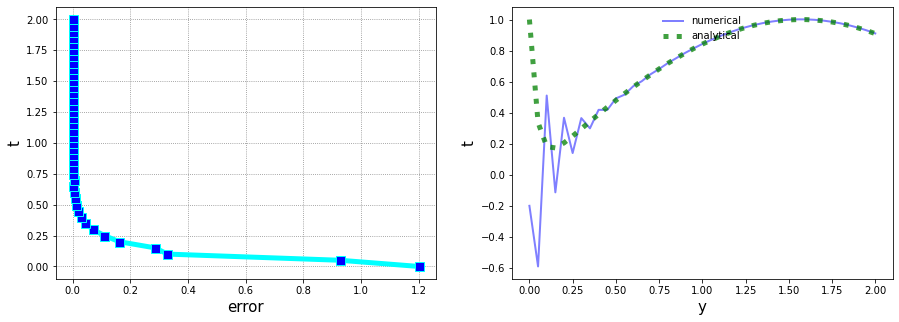

In [556]:
implicit_euler(0.05, 1.6)
# eps < 1.6 gives runtime error

#### h = 0.025

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,0.4,6.00e-01
1,0.025,0.560259,0.640379,8.01e-02
2,0.05,0.336484,0.428667,9.22e-02
3,0.075,0.228285,0.307956,7.97e-02
4,0.1,0.181918,0.243216,6.13e-02
...,...,...,...,...
76,1.9,0.9463,0.94582,4.80e-04
77,1.925,0.937923,0.937447,4.76e-04
78,1.95,0.92896,0.928487,4.72e-04
79,1.975,0.919416,0.918948,4.68e-04


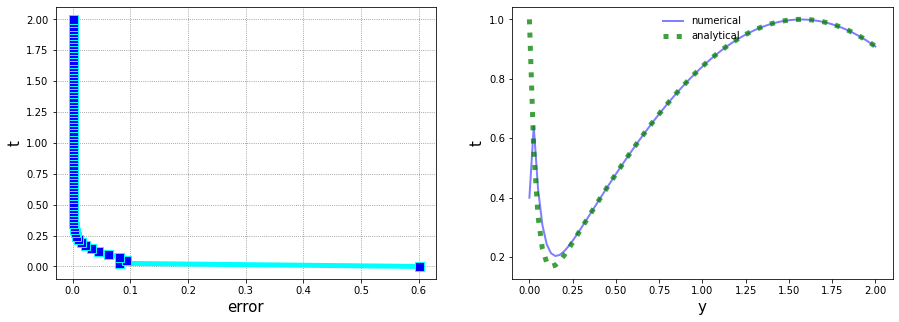

In [557]:
implicit_euler(0.025, 0.000000001)

### Modified Euler

In [558]:
def modified_euler(h):
    yn = 1.0
    numerical = []
    grid = make_grid(h)
    numerical.append(yn)
    for tn in grid:
        yn_1 = yn + (h/2)*(f(tn, yn)+f(tn + h, yn + h*f(tn, yn)))
        numerical.append(yn_1)
        yn = yn_1
    return make_results(grid, analytical(h), numerical)

#### h = 0.2

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.2,0.205407,8.69468,8.49e+00
2,0.4,0.389464,72.591712,7.22e+01
3,0.6,0.564643,614.261083,6.14e+02
...,...,...,...,...
7,1.4,0.98545,3203512.279205,3.20e+06
8,1.6,0.999574,27229846.946771,2.72e+07
9,1.8,0.973848,231453691.4754,2.31e+08
10,2.0,0.909297,1967356370.124937,1.97e+09


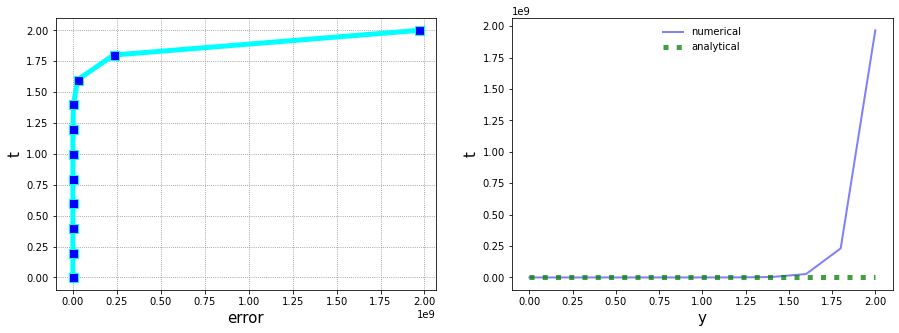

In [559]:
modified_euler(0.2).drop([4, 6])

#### h = 0.1

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.1,0.181918,1.724542,1.54e+00
2,0.2,0.205407,2.837908,2.63e+00
3,0.3,0.296073,4.582757,4.29e+00
4,0.4,0.389464,7.354056,6.96e+00
...,...,...,...,...
16,1.6,0.999574,2360.356949,2.36e+03
17,1.7,0.991665,3834.94117,3.83e+03
18,1.8,0.973848,6231.135643,6.23e+03
19,1.9,0.9463,10124.953206,1.01e+04


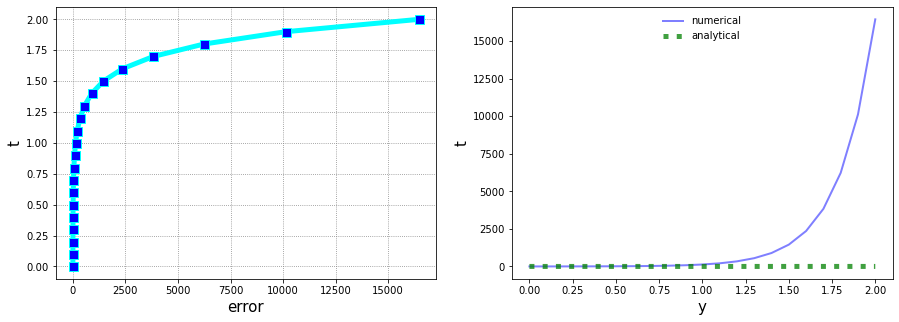

In [560]:
modified_euler(0.1)

#### h = 0.05

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.05,0.336484,0.581206,2.45e-01
2,0.1,0.181918,0.381985,2.00e-01
3,0.15,0.172956,0.29923,1.26e-01
4,0.2,0.205407,0.278106,7.27e-02
...,...,...,...,...
36,1.8,0.973848,0.972205,1.64e-03
37,1.85,0.961275,0.959648,1.63e-03
38,1.9,0.9463,0.944691,1.61e-03
39,1.95,0.92896,0.927374,1.59e-03


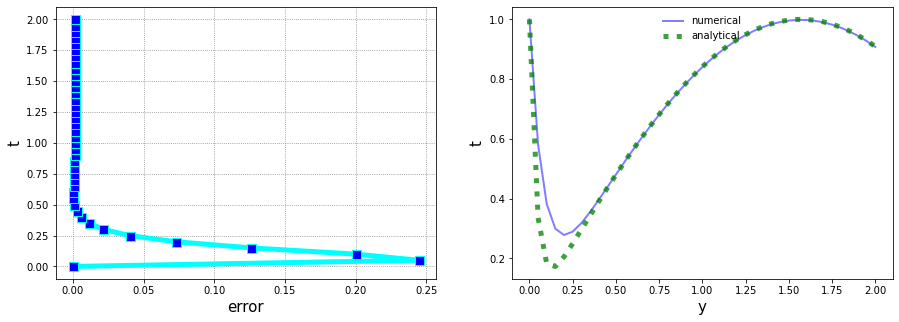

In [561]:
modified_euler(0.05)

### Trapezoid

In [562]:
def trapezoid(h, eps):
    yn = 1.0
    numerical = []
    grid = make_grid(h)
    numerical.append(yn + h*f(0.0, yn))
    for tn in grid:
        yk = yn + h*f(tn, yn)
        while True:
            yk_1 = yn + h*f(tn + h, yk)
            if abs(yk_1-yk) < eps:
                break
            yk = yk_1
        yn_1 = yn + (h/2)*(f(tn, yn) + f(tn + h, yk_1))
        numerical.append(yn_1)
        yn = yn_1
    return make_results(grid, analytical(h), numerical)

#### h = 0.2

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,-3.8,4.80e+00
1,0.2,0.205407,-53.77872,5.40e+01
2,0.4,0.389464,2915.249948,2.91e+03
3,0.6,0.564643,-157401.766827,1.57e+05
...,...,...,...,...
7,1.4,0.98545,-1338400867855.46875,1.34e+12
8,1.6,0.999574,72273646864249.84375,7.23e+13
9,1.8,0.973848,-3902776930669436.5,3.90e+15
10,2.0,0.909297,210749954256149728.0,2.11e+17


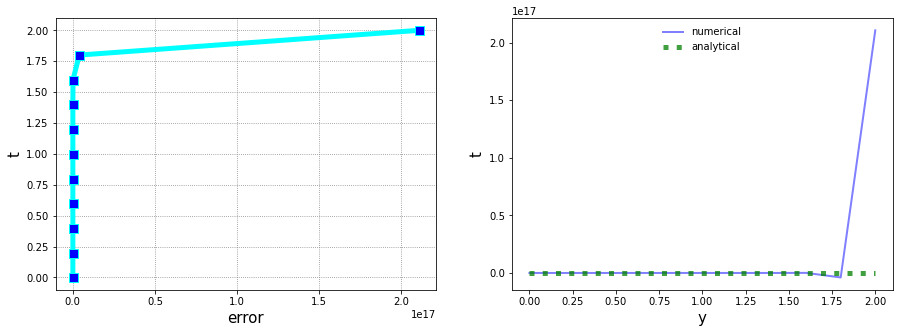

In [563]:
trapezoid(0.2, 100000000000000000).drop([4, 6])
# eps < 10^17 gives runtime error

#### h = 0.1

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,-1.4,2.40e+00
1,0.1,0.181918,-6.086813,6.27e+00
2,0.2,0.205407,38.481575,3.83e+01
3,0.3,0.296073,-236.574779,2.37e+02
4,0.4,0.389464,1466.031665,1.47e+03
...,...,...,...,...
16,1.6,0.999574,4615408505010.224609,4.62e+12
17,1.7,0.991665,-28557840124743.570312,2.86e+13
18,1.8,0.973848,176701635771858.03125,1.77e+14
19,1.9,0.9463,-1093341371338364.75,1.09e+15


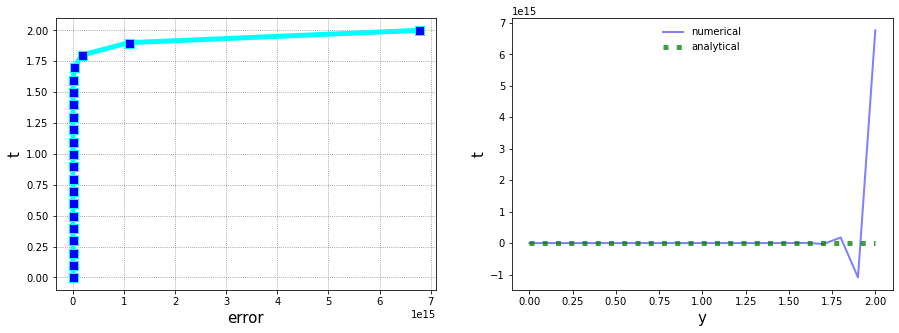

In [564]:
trapezoid(0.1, 10000000000000000)
# eps < 10^16 gives runtime error

#### h = 0.05

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,-0.2,1.20e+00
1,0.05,0.336484,-0.395301,7.32e-01
2,0.1,0.181918,0.298242,1.16e-01
3,0.15,0.172956,0.061291,1.12e-01
4,0.2,0.205407,0.238216,3.28e-02
...,...,...,...,...
36,1.8,0.973848,0.975037,1.19e-03
37,1.85,0.961275,0.96245,1.17e-03
38,1.9,0.9463,0.947458,1.16e-03
39,1.95,0.92896,0.930097,1.14e-03


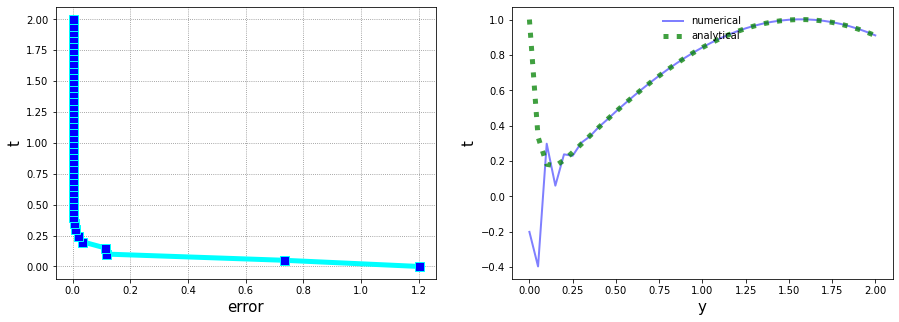

In [565]:
trapezoid(0.05, 1.6)
# eps < 1.6 gives runtime error

### Runge-Kutta

In [566]:
def runge_kutta(h):
    yn = 1.0
    numerical = []
    grid = make_grid(h)
    numerical.append(yn)
    for tn in grid:
        kn1 = f(tn, yn)
        kn2 = f(tn + h/2, yn + kn1*h/2)
        kn3 = f(tn + h/2, yn + kn2*h/2)
        kn4 = f(tn + h, yn + kn3*h)
        kn = (1/6)*(kn1 + 2*kn2 + 2*kn3 + kn4)
        yn_1 = yn + h*kn
        numerical.append(yn_1)
        yn = yn_1
    return make_results(grid, analytical(h), numerical)

#### h = 0.5

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.5,0.479429,758.34676,7.58e+02
2,1.0,0.841471,574731.815457,5.75e+05
3,1.5,0.997495,435851122.013487,4.36e+08
4,2.0,0.909297,330530648693.613464,3.31e+11


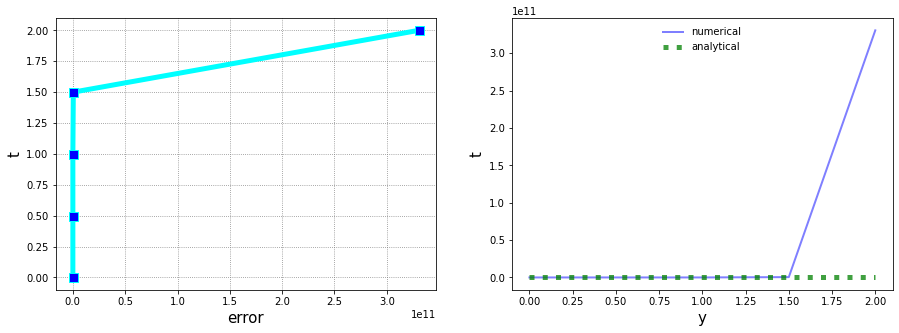

In [567]:
runge_kutta(0.5)[:5]

#### h = 0.25

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.25,0.249334,37.40811,3.72e+01
2,0.5,0.479429,1381.674144,1.38e+03
...,...,...,...,...
6,1.5,0.997495,2636318923.90035,2.64e+09
7,1.75,0.983986,97990481137.609406,9.80e+10
8,2.0,0.909297,3642250681428.166016,3.64e+12


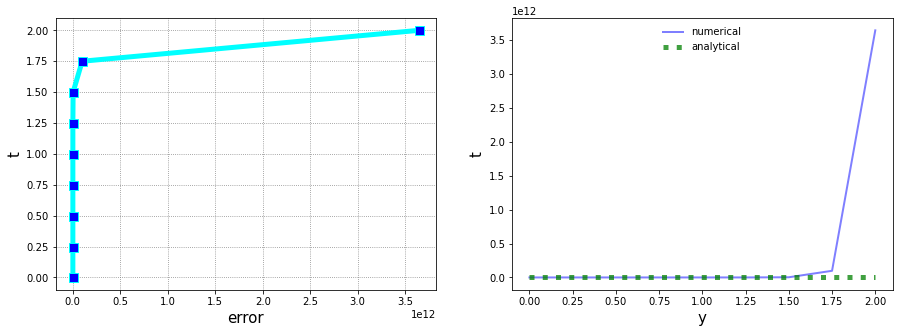

In [568]:
runge_kutta(0.25).drop([3, 4, 5])

#### h = 0.125

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.125,0.168612,1.769698,1.60e+00
2,0.25,0.249334,2.952996,2.70e+00
3,0.375,0.366357,4.816101,4.45e+00
4,0.5,0.479429,7.798274,7.32e+00
...,...,...,...,...
12,1.5,0.997495,393.544231,3.93e+02
13,1.625,0.998531,646.808502,6.46e+02
14,1.75,0.983986,1063.460737,1.06e+03
15,1.875,0.954086,1748.927977,1.75e+03


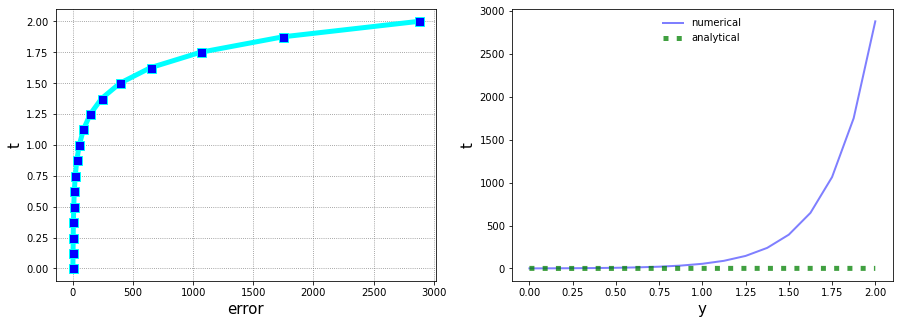

In [569]:
runge_kutta(0.125)

#### h = 0.1

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.1,0.181918,0.748222,5.66e-01
2,0.2,0.205407,0.618898,4.13e-01
3,0.3,0.296073,0.567641,2.72e-01
4,0.4,0.389464,0.565345,1.76e-01
...,...,...,...,...
16,1.6,0.999574,0.996148,3.43e-03
17,1.7,0.991665,0.98782,3.85e-03
18,1.8,0.973848,0.969748,4.10e-03
19,1.9,0.9463,0.942069,4.23e-03


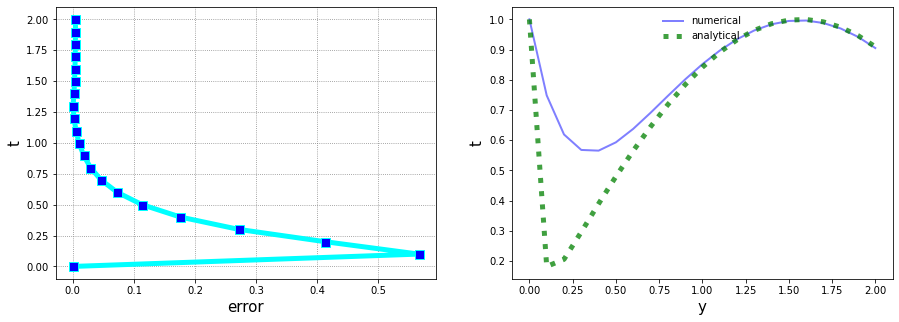

In [570]:
runge_kutta(0.1)

#### h = 0.01

,t,analytical,numerical,|numerical-analytical|
0,0.0,1.0,1.0,0.00e+00
1,0.05,0.336484,0.357432,2.09e-02
2,0.1,0.181918,0.194358,1.24e-02
3,0.15,0.172956,0.178494,5.54e-03
4,0.2,0.205407,0.207594,2.19e-03
...,...,...,...,...
36,1.8,0.973848,0.973775,7.22e-05
37,1.85,0.961275,0.961204,7.15e-05
38,1.9,0.9463,0.94623,7.05e-05
39,1.95,0.92896,0.92889,6.94e-05


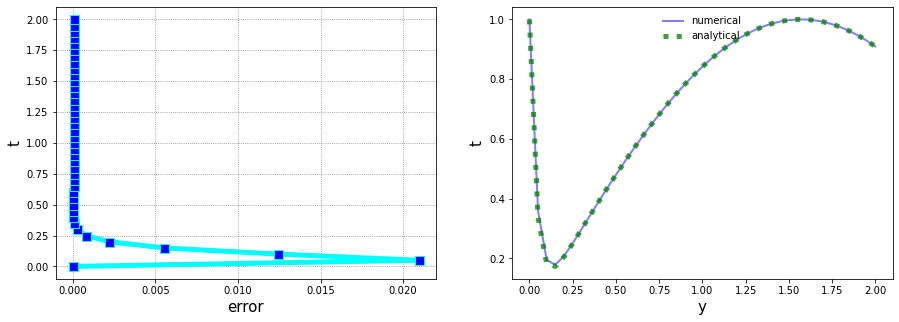

In [571]:
runge_kutta(0.05)